In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import json

In [2]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  0


In [3]:
x_train = np.load("data/x_trainBIG_left.npy")
y_train = np.load("data/y_trainBIG_left.npy")
x_test = np.load("data/x_test.npy")
y_test = np.load("data/y_test.npy")

In [4]:
input_shape = x_train.shape[1:]
input_shape

(292, 608, 3)

In [5]:
model1 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=input_shape),
    tf.keras.layers.Dense(units=128, activation='relu'),
  tf.keras.layers.Dense(5, activation='softmax'),
])
model1.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 532608)            0         
                                                                 
 dense (Dense)               (None, 128)               68173952  
                                                                 
 dense_1 (Dense)             (None, 5)                 645       
                                                                 
Total params: 68,174,597
Trainable params: 68,174,597
Non-trainable params: 0
_________________________________________________________________


In [6]:
model1.compile(optimizer='adam', loss='SparseCategoricalCrossentropy', metrics=['accuracy'])
hist1 = model1.fit(
    x_train, 
    y_train,
    epochs=30,
    batch_size=30,
    validation_data=(x_test, y_test))

Epoch 1/30
44/44 [==============================] - 9s 207ms/step - loss: 74150.1250 - accuracy: 0.3303 - val_loss: 318172.7500 - val_accuracy: 0.2750
Epoch 2/30
44/44 [==============================] - 9s 203ms/step - loss: 10656.5107 - accuracy: 0.8008 - val_loss: 220416.5625 - val_accuracy: 0.1450
Epoch 3/30
44/44 [==============================] - 9s 206ms/step - loss: 7995.6279 - accuracy: 0.7583 - val_loss: 139812.6875 - val_accuracy: 0.2700
Epoch 4/30
44/44 [==============================] - 9s 208ms/step - loss: 3879.7905 - accuracy: 0.8750 - val_loss: 66808.5859 - val_accuracy: 0.5000
Epoch 5/30
44/44 [==============================] - 9s 207ms/step - loss: 3812.9451 - accuracy: 0.8348 - val_loss: 33315.4844 - val_accuracy: 0.3900
Epoch 6/30
44/44 [==============================] - 9s 206ms/step - loss: 1637.0934 - accuracy: 0.8985 - val_loss: 10108.7471 - val_accuracy: 0.3650
Epoch 7/30
44/44 [==============================] - 9s 200ms/step - loss: 621.0309 - accuracy: 0.9280

In [7]:
model1.save("model1.h5")

In [8]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=input_shape),
    tf.keras.layers.MaxPooling2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=5, activation='softmax')
])
model2.compile(
    optimizer='adam',
    loss ='SparseCategoricalCrossentropy', 
    metrics=['accuracy'])

In [9]:
hist2 = model2.fit(
    x_train, 
    y_train,    
    epochs=30,
    batch_size=30,
    validation_data=(x_test, y_test))

Epoch 1/30
44/44 [==============================] - 111s 2s/step - loss: 30565.6445 - accuracy: 0.5121 - val_loss: 1484.2111 - val_accuracy: 0.3600
Epoch 2/30
44/44 [==============================] - 109s 2s/step - loss: 45.7103 - accuracy: 0.9326 - val_loss: 1400.6204 - val_accuracy: 0.3950
Epoch 3/30
44/44 [==============================] - 109s 2s/step - loss: 19.2533 - accuracy: 0.9530 - val_loss: 2326.2068 - val_accuracy: 0.3250
Epoch 4/30
44/44 [==============================] - 109s 2s/step - loss: 5.3141 - accuracy: 0.9788 - val_loss: 2408.7764 - val_accuracy: 0.3050
Epoch 5/30
44/44 [==============================] - 109s 2s/step - loss: 9.6006 - accuracy: 0.9742 - val_loss: 1796.7211 - val_accuracy: 0.3500
Epoch 6/30
44/44 [==============================] - 109s 2s/step - loss: 10.9067 - accuracy: 0.9735 - val_loss: 1467.5231 - val_accuracy: 0.3700
Epoch 7/30
44/44 [==============================] - 109s 2s/step - loss: 10.5718 - accuracy: 0.9712 - val_loss: 1765.2632 - val_a

In [10]:
model2.save("model2.h5")
with open('history2.json', 'w') as handle: # saving the history of the model
    json.dump(hist2.history, handle)

Model used in facial expression recognition

In [11]:
# model Alizadeh and Fazel
from keras.layers import Conv2D, Activation, BatchNormalization, MaxPooling2D, Dropout, Dense, Flatten
from keras.models import Sequential

model_fe = Sequential()

model_fe.add(Conv2D(64, 3, padding='same', input_shape=input_shape))
model_fe.add(BatchNormalization())
model_fe.add(Activation('relu'))
model_fe.add(MaxPooling2D(pool_size=2, strides=None, padding='same'))
model_fe.add(Dropout(0.25))

model_fe.add(Conv2D(128, 3, padding='same'))
model_fe.add(BatchNormalization())
model_fe.add(Activation('relu'))
model_fe.add(MaxPooling2D(pool_size=2, strides=None, padding='same'))
model_fe.add(Dropout(0.25))

model_fe.add(Conv2D(256, 3, padding='same'))
model_fe.add(BatchNormalization())
model_fe.add(Activation('relu'))
model_fe.add(MaxPooling2D(pool_size=2, strides=None, padding='same'))
model_fe.add(Dropout(0.25))

model_fe.add(Conv2D(512, 3, padding='same'))
model_fe.add(BatchNormalization())
model_fe.add(Activation('relu'))
model_fe.add(MaxPooling2D(pool_size=2, strides=None, padding='same'))
model_fe.add(Dropout(0.25))

model_fe.add(Flatten())

model_fe.add(Dense(512))
model_fe.add(BatchNormalization())
model_fe.add(Activation('relu'))
model_fe.add(Dropout(0.25))

model_fe.add(Dense(256))
model_fe.add(BatchNormalization())
model_fe.add(Activation('relu'))
model_fe.add(Dropout(0.25))

model_fe.add(Dense(5))
model_fe.add(Activation('softmax'))

In [12]:
# y_train_oh = tf.keras.utils.to_categorical(y_train, 5)
# y_test_oh = tf.keras.utils.to_categorical(y_test, 5)

model_fe.compile(
    loss='SparseCategoricalCrossentropy', 
    optimizer='adam', 
    metrics=['accuracy'])

hist_fe = model_fe.fit(
    x_train, 
    y_train,
    epochs=30,
    batch_size=30,
    validation_data=(x_test, y_test)
    )

Epoch 1/50
44/44 [==============================] - 427s 10s/step - loss: 0.3633 - accuracy: 0.8879 - val_loss: 46.9047 - val_accuracy: 0.2350
Epoch 2/50
44/44 [==============================] - 425s 10s/step - loss: 0.1633 - accuracy: 0.9530 - val_loss: 6.1306 - val_accuracy: 0.2450
Epoch 3/50
44/44 [==============================] - 425s 10s/step - loss: 0.1441 - accuracy: 0.9545 - val_loss: 4.2162 - val_accuracy: 0.3400
Epoch 4/50
44/44 [==============================] - 425s 10s/step - loss: 0.1167 - accuracy: 0.9629 - val_loss: 2.7900 - val_accuracy: 0.4000
Epoch 5/50
44/44 [==============================] - 425s 10s/step - loss: 0.1079 - accuracy: 0.9674 - val_loss: 1.8108 - val_accuracy: 0.5050
Epoch 6/50
44/44 [==============================] - 425s 10s/step - loss: 0.1056 - accuracy: 0.9667 - val_loss: 3.9785 - val_accuracy: 0.3200
Epoch 7/50
44/44 [==============================] - 425s 10s/step - loss: 0.0908 - accuracy: 0.9689 - val_loss: 1.9013 - val_accuracy: 0.3950
Epoch

In [13]:
model_fe.save("model_fe.h5")
with open('history_fe.json', 'w') as handle: # saving the history of the model
    json.dump(hist_fe.history, handle)

Transfer Learning

In [14]:
model = tf.keras.applications.MobileNetV2(input_shape=input_shape, include_top=False, weights='imagenet')
model.trainable = False

# adding the top classification layer
model_tl = tf.keras.Sequential(
    [
        model,
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(units=5, activation='softmax')
    ]
)
model_tl.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 10, 19, 1280)     2257984   
 ional)                                                          
                                                                 
 flatten_3 (Flatten)         (None, 243200)            0         
                                                                 
 dense_7 (Dense)             (None, 5)                 1216005   
                                                                 
Total params: 3,473,989
Trainable params: 1,216,005
Non-trainable params: 2,257,984
_________________________________________________________________


In [15]:
model_tl.compile(optimizer="adam",
                 loss='SparseCategoricalCrossentropy',
                 metrics=['accuracy'])
hist_tl = model_tl.fit(
    x_train, 
    y_train, 
    epochs=30, 
    batch_size=30, 
    validation_data=(x_test, y_test))

Epoch 1/30
44/44 [==============================] - 60s 1s/step - loss: 4.9464 - accuracy: 0.7924 - val_loss: 12.6196 - val_accuracy: 0.6400
Epoch 2/30
44/44 [==============================] - 59s 1s/step - loss: 0.3569 - accuracy: 0.9598 - val_loss: 27.6082 - val_accuracy: 0.6000
Epoch 3/30
44/44 [==============================] - 59s 1s/step - loss: 0.4155 - accuracy: 0.9780 - val_loss: 21.7576 - val_accuracy: 0.6600
Epoch 4/30
44/44 [==============================] - 59s 1s/step - loss: 0.7856 - accuracy: 0.9545 - val_loss: 0.4829 - val_accuracy: 0.9500
Epoch 5/30
44/44 [==============================] - 59s 1s/step - loss: 0.8085 - accuracy: 0.9720 - val_loss: 37.5156 - val_accuracy: 0.6100
Epoch 6/30
44/44 [==============================] - 59s 1s/step - loss: 0.5854 - accuracy: 0.9720 - val_loss: 23.3506 - val_accuracy: 0.4900
Epoch 7/30
44/44 [==============================] - 58s 1s/step - loss: 0.3605 - accuracy: 0.9742 - val_loss: 28.7955 - val_accuracy: 0.5950
Epoch 8/30
44/

In [16]:
model_tl.save("model_tl.h5")
with open('history_tl.json', 'w') as handle: # saving the history of the model
    json.dump(hist_tl.history, handle)

### Visualizations

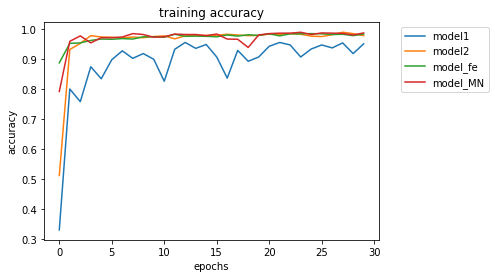

In [31]:
plt.plot(hist1.history["accuracy"], label="model1")
plt.plot(hist2.history["accuracy"], label="model2")
plt.plot(hist_fe["accuracy"][:30], label="model_fe")
plt.plot(hist_tl.history["accuracy"],label="model_MN")

plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("training accuracy")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

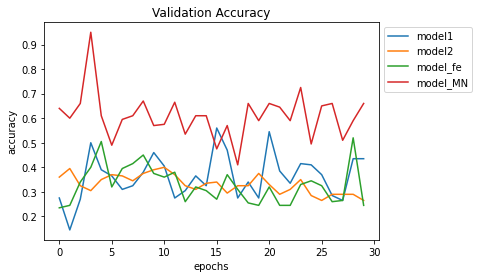

In [35]:
plt.plot(hist1.history["val_accuracy"], label="model1")
plt.plot(hist2.history["val_accuracy"], label="model2")
plt.plot(hist_fe["val_accuracy"][:30], label="model_fe")
plt.plot(hist_tl.history["val_accuracy"],label="model_MN")

plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("Validation Accuracy")
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

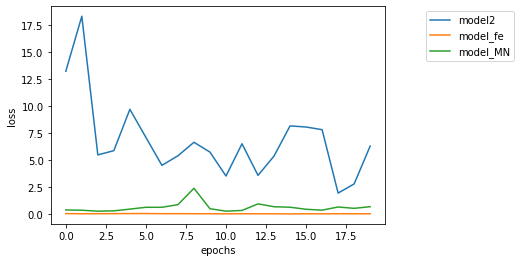

In [27]:
# plt.plot(hist1.history["loss"][10:], label="model1")
plt.plot(hist2.history["loss"][10:], label="model2")
plt.plot(hist_fe["loss"][10:30], label="model_fe")
plt.plot(hist_tl.history["loss"][10:],label="model_MN")

# plt.plot(hist1.history["val_loss"][10:], label="model1_val")
# plt.plot(hist2.history["val_loss"][10:], label="model2_val")
# plt.plot(hist_fe.history["val_loss"][10:], label="model_fe_val")
# plt.plot(hist_tl.history["val_loss"],label="model_MN")

plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(bbox_to_anchor=(1.4, 1))
plt.show()

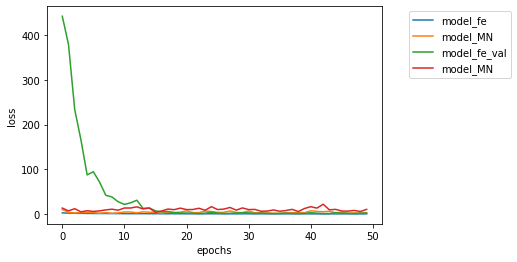

In [ ]:
# plt.plot(hist1.history["loss"], label="model1")
# plt.plot(hist2.history["loss"], label="model2")
plt.plot(hist_fe.history["loss"], label="model_fe")
plt.plot(hist_tl.history["loss"][:50],label="model_MN")

# plt.plot(hist1.history["val_loss"], label="model1_val")
# plt.plot(hist2.history["val_loss"], label="model2_val")
plt.plot(hist_fe.history["val_loss"], label="model_fe_val")
plt.plot(hist_tl.history["val_loss"],label="model_MN")

plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(bbox_to_anchor=(1.4, 1))
plt.show()

Evaluate accuracy with test set

In [28]:
# loss1, acc1 = model1.evaluate(x_test, y_test)
loss2, acc2 = model2.evaluate(x_train, y_train)
loss_fe, acc_fe = model_fe.evaluate(x_test, y_test)
loss_tl, acc_tl = model_tl.evaluate(x_train, y_train)

42/42 [==============================] - 52s 1s/step - loss: 0.3035 - accuracy: 0.9894


In [29]:
pred = model_tl.predict(x_test)
labels = tf.argmax(pred, axis=1)
cm = tf.math.confusion_matrix(labels, y_test)

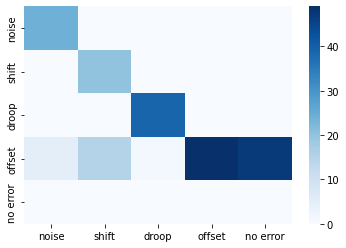

In [30]:
import seaborn as sns

l = ["noise", "shift", "droop", "offset", "no error"]
ax = sns.heatmap(cm, cmap="Blues")
ax.xaxis.set_ticklabels(l)
ax.yaxis.set_ticklabels(l)
plt.show()